In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Import TensorFlow
import tensorflow as tf
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import RMSprop, Adam

from ann_utils import *

C:\ProgramData\Anaconda3\envs\thesis_mlflow\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\envs\thesis_mlflow\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\envs\thesis_mlflow\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
preproc_folder = "enriched_shuffle"
datafolder = "../data/preproc_traintest/"+preproc_folder+'/'
output_path = "../data/models/"

prefix = 'shuffle_imp_bg_'
postfix = '_190721_1655'
trainfile = '_traindata'
testfile = '_testdata'

[X_train, y_train, feature_labels] = pd.read_pickle(datafolder+prefix+trainfile+postfix+'.pkl') 
[X_test, y_test, feature_labels] = pd.read_pickle(datafolder+prefix+testfile+postfix+'.pkl') 

In [4]:
len(feature_labels)

35

In [36]:
mlp = create_mlp_model(35, 1, [20], [tf.nn.relu],                                        #35, 2, [20, 5], [tf.nn.relu, tf.nn.relu],
                      optimizer = RMSprop(),
                      loss_func="binary_crossentropy")

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 20)                720       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 21        
Total params: 741
Trainable params: 741
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
X_train.shape

(46095, 35)

In [38]:
early_stopping = TerminateOnBaseline(monitor='accuracy', baseline=0.985)
batch_size = 256
epochs=100

#creating validation data
validation_size = 10000

X_val = X_train[:validation_size]
partial_X_train = X_train[validation_size:]
y_val = y_train[:validation_size]
partial_y_train = y_train[validation_size:]

history = mlp.fit(partial_X_train, partial_y_train, epochs=epochs,  batch_size = batch_size, verbose=1, 
        steps_per_epoch=math.ceil(X_train.shape[0]/batch_size), callbacks=[early_stopping],
                 validation_data=(X_val, y_val))
        

Epoch 1/100
181/181 [==============================] - 2s 13ms/step - loss: 0.2623 - accuracy: 0.9295 - precision: 0.0481 - recall: 0.1262 - val_loss: 0.0855 - val_accuracy: 0.9803 - val_precision: 0.6818 - val_recall: 0.1408
Epoch 2/100
181/181 [==============================] - 2s 10ms/step - loss: 0.0739 - accuracy: 0.9811 - precision: 0.7118 - recall: 0.1618 - val_loss: 0.0669 - val_accuracy: 0.9820 - val_precision: 0.7895 - val_recall: 0.2113
Epoch 3/100
181/181 [==============================] - 2s 10ms/step - loss: 0.0636 - accuracy: 0.9820 - precision: 0.7534 - recall: 0.2091 - val_loss: 0.0633 - val_accuracy: 0.9824 - val_precision: 0.7937 - val_recall: 0.2347
Epoch 4/100
181/181 [==============================] - 2s 11ms/step - loss: 0.0595 - accuracy: 0.9823 - precision: 0.7622 - recall: 0.2240 - val_loss: 0.0619 - val_accuracy: 0.9821 - val_precision: 0.7361 - val_recall: 0.2488
Epoch 5/100
181/181 [==============================] - 2s 11ms/step - loss: 0.0571 - accuracy: 0

In [39]:
history_dict = history.history

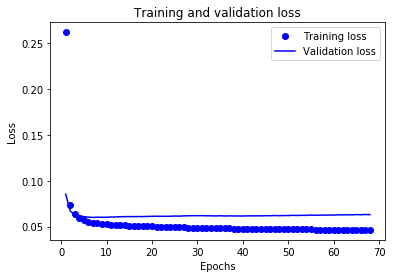

In [40]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

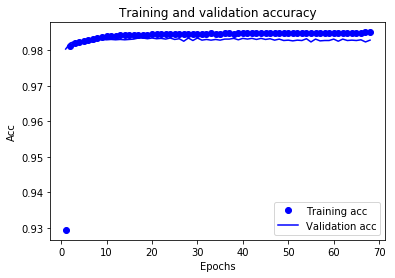

In [41]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values)+1)

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend()

plt.show()

In [42]:
predictions = mlp.predict(X_test)

In [43]:
predictions.round()

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [44]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, confusion_matrix
fpr, tpr, thresholds = roc_curve(y_test, predictions) #false positive rate, true positive rate and thresholds
auc = roc_auc_score(y_test, predictions)
        
print('AUC: {}'.format(auc))

AUC: 0.9065894035214989
